https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-santander-value

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing, model_selection, metrics
import lightgbm as lgb

color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# pd.options.mode.chained_assignment = None
# pd.options.display.max_columns = 9999

/Users/johnrick/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# 1st Notebook

https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-santander-value

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Train rows and columns : ", train_df.shape)
print("Test rows and columns : ", test_df.shape)

Train rows and columns :  (4459, 4993)
Test rows and columns :  (49342, 4992)


In [3]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [4]:
train_df.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


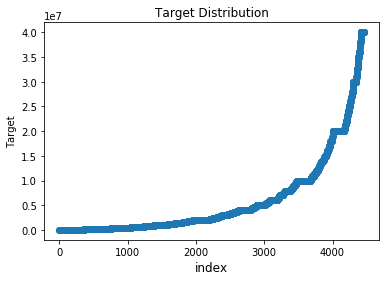

In [5]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df['target'].values))
plt.xlabel('index',fontsize=12)
plt.ylabel('Target')
plt.title('Target Distribution')
plt.show()

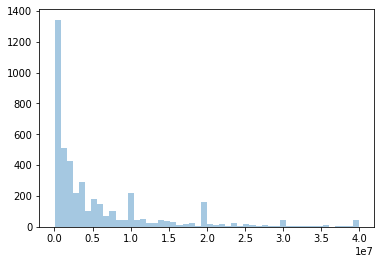

In [6]:
sns.distplot(train_df['target'].values, bins=50, kde=False)

#### Notes- skewed datapoints RMSLE

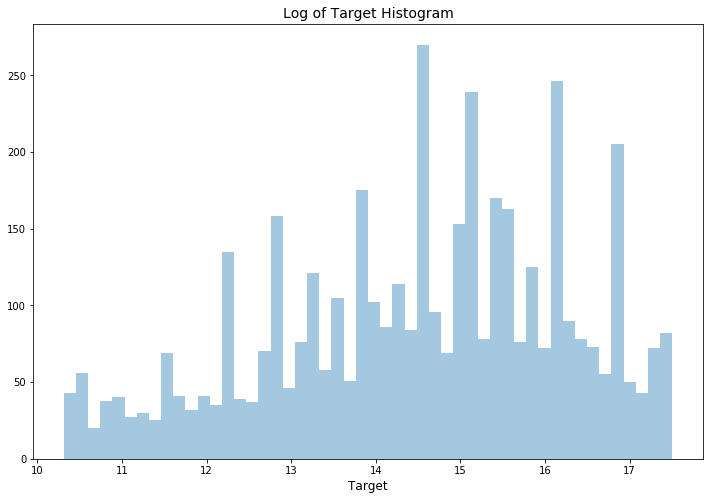

In [7]:
plt.figure(figsize=(12,8))
sns.distplot( np.log1p(train_df["target"].values), bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Log of Target Histogram", fontsize=14)
plt.show()

In [8]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df


,column_name,missing_count


In [9]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


In [10]:
unique_df = train_df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_df = unique_df[unique_df["unique_count"]==1]
constant_df.shape


(256, 2)

In [11]:
str(constant_df.col_name.tolist())

"['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a742107', '08b9ec4ae', 'd95203ded

#### Notes - Spearman Correlation and Pearson Corrlation

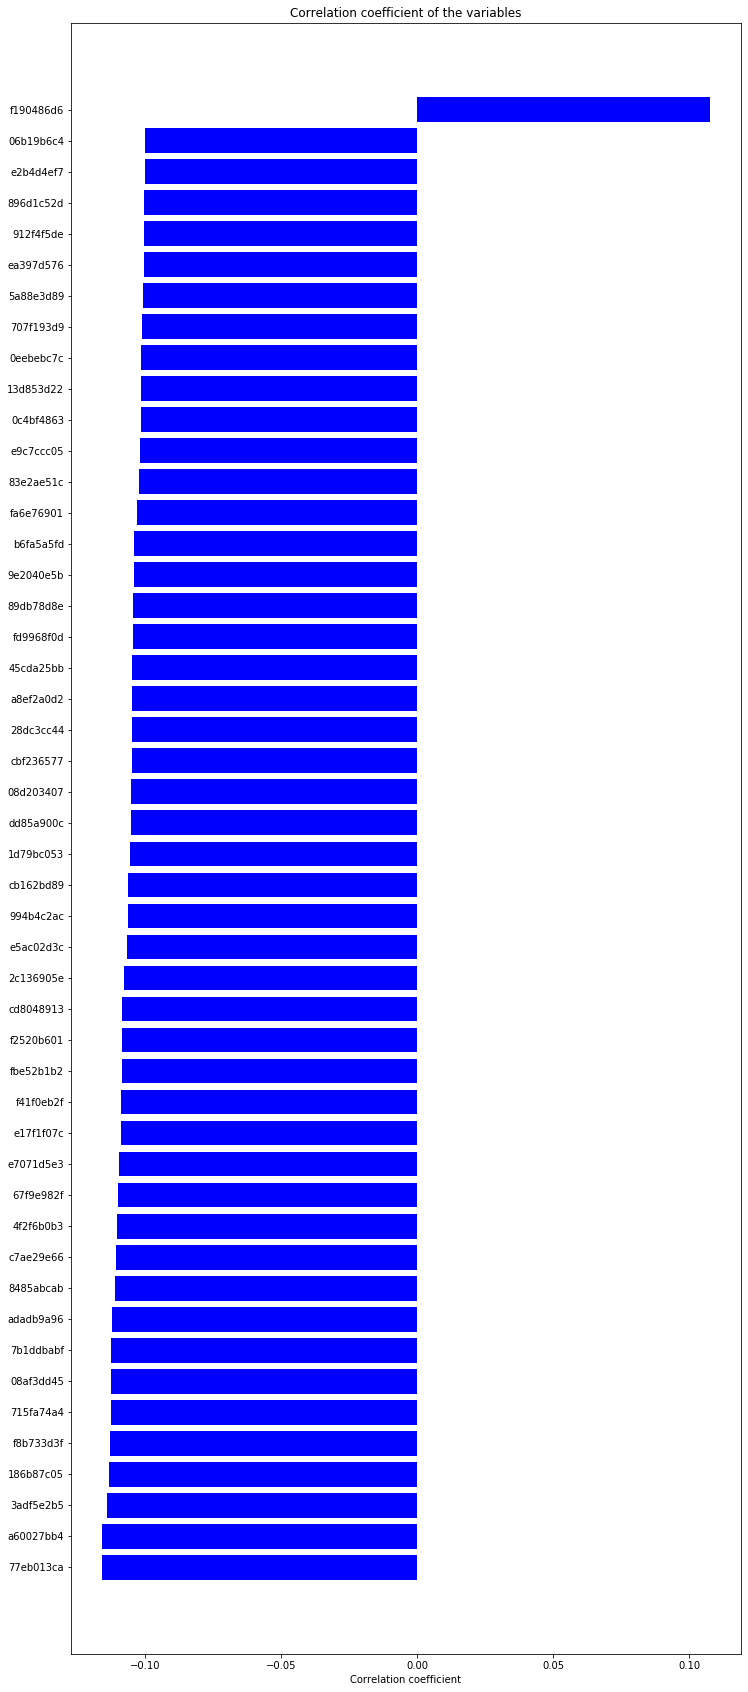

In [12]:
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings("ignore")

labels = []
values = []
for col in train_df.columns:
    if col not in ["ID", "target"]:
        labels.append(col)
        values.append(spearmanr(train_df[col].values, train_df["target"].values)[0])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
 
corr_df = corr_df[(corr_df['corr_values']>0.1) | (corr_df['corr_values']<-0.1)]
ind = np.arange(corr_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,30))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='b')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()


In [13]:
cols_to_use = corr_df[(corr_df['corr_values']>0.11) | (corr_df['corr_values']<-0.11)].col_labels.tolist()



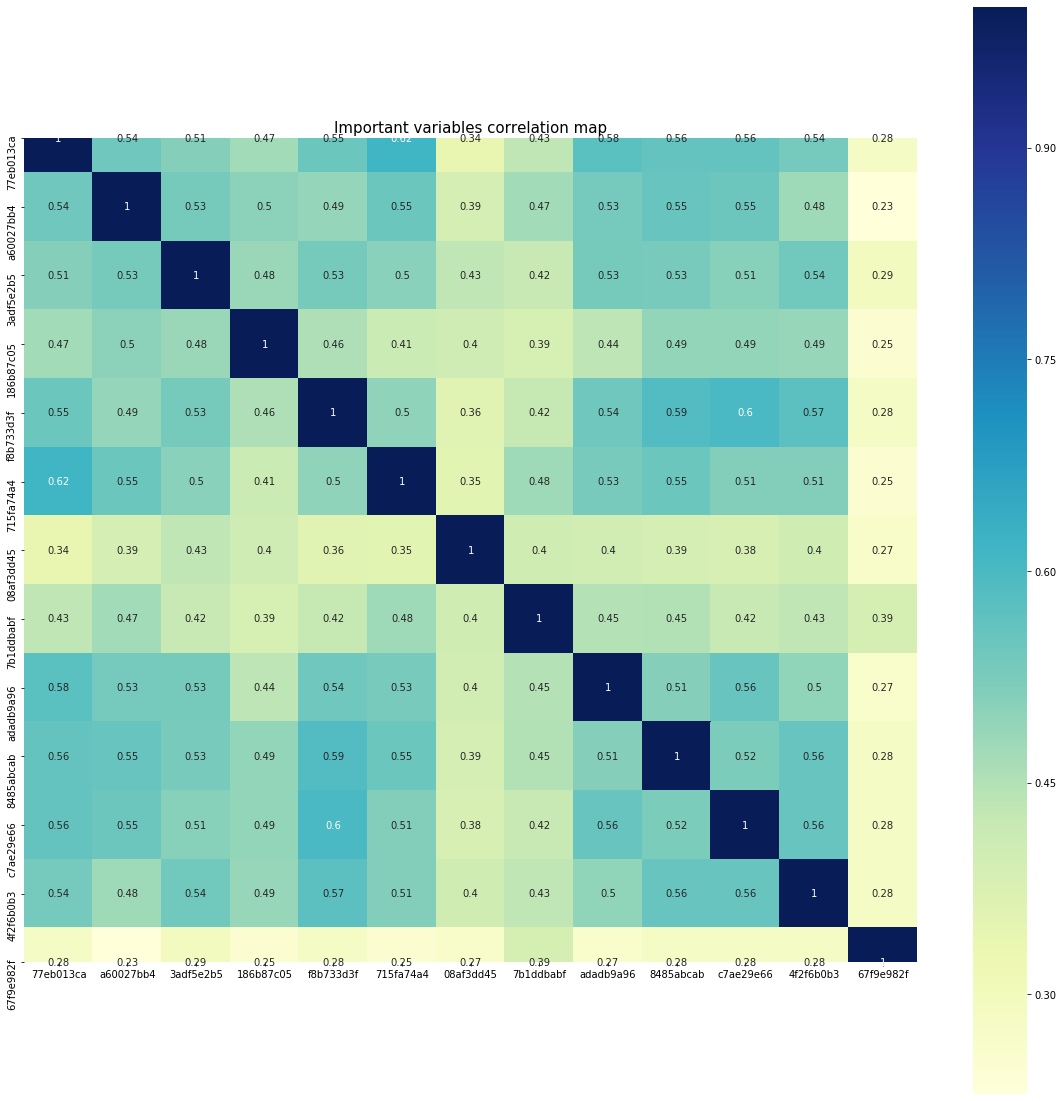

In [14]:
temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(20, 20))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, cmap="YlGnBu", annot=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

## Extra Trees Model

In [15]:
### Get the X and y variables for building model ###
train_X = train_df.drop(constant_df.col_name.tolist() + ["ID", "target"], axis=1)
test_X = test_df.drop(constant_df.col_name.tolist() + ["ID"], axis=1)
train_y = np.log1p(train_df["target"].values)


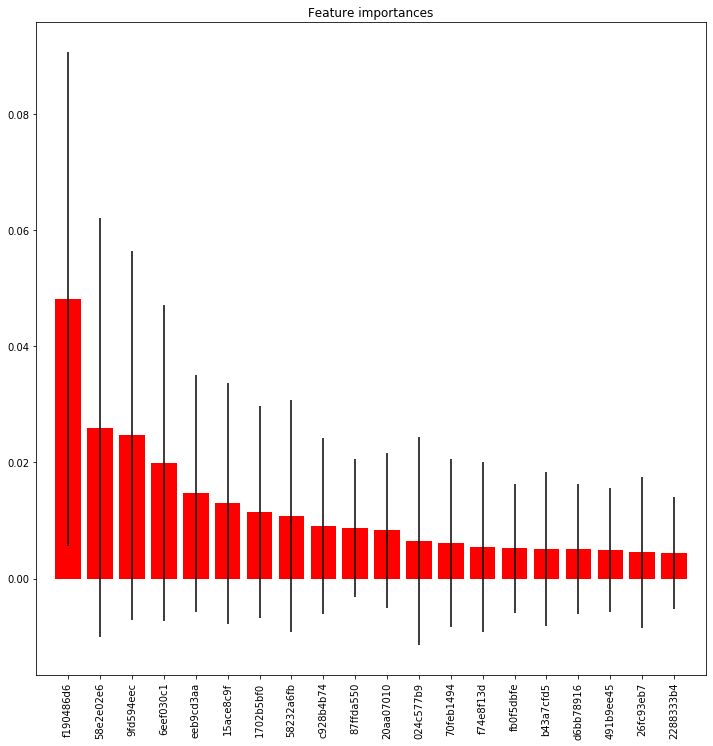

In [16]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=200, max_depth=20, max_features=0.5, n_jobs=-1, random_state=0)
model.fit(train_X, train_y)

## plot the importances ##
feat_names = train_X.columns.values
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()


In [17]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result

In [18]:
# K-fold cross validation

In [ ]:
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 30,
        "learning_rate" : 0.01,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.7,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=200, evals_result=evals_result)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    return pred_test_y, model, evals_result


In [19]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
pred_test_full = 0
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.loc[dev_index,:], train_X.loc[val_index,:]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_test, model, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test_X)
    pred_test_full += pred_test
pred_test_full /= 5.
pred_test_full = np.expm1(pred_test_full)

Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 1.44307
[400]	valid_0's rmse: 1.42319
Early stopping, best iteration is:
[354]	valid_0's rmse: 1.4228
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 1.44416
[400]	valid_0's rmse: 1.4089
Early stopping, best iteration is:
[459]	valid_0's rmse: 1.40696
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 1.44369
[400]	valid_0's rmse: 1.41676
Early stopping, best iteration is:
[427]	valid_0's rmse: 1.41655
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 1.49096
[400]	valid_0's rmse: 1.45485
[600]	valid_0's rmse: 1.44857
[800]	valid_0's rmse: 1.44774
[1000]	valid_0's rmse: 1.44622
Did not meet early stopping. Best iteration is:
[982]	valid_0's rmse: 1.44611
Training until validation scores don't improve for 100 rounds
[200]	valid_0's rmse: 1.48087
[400]	valid_0's rmse: 1.46216
Early stopping, best iterati

In [20]:
# Making a submission file #
sub_df = pd.DataFrame({"ID":test_df["ID"].values})
sub_df["target"] = pred_test_full
sub_df.to_csv("baseline_lgb.csv", index=False)


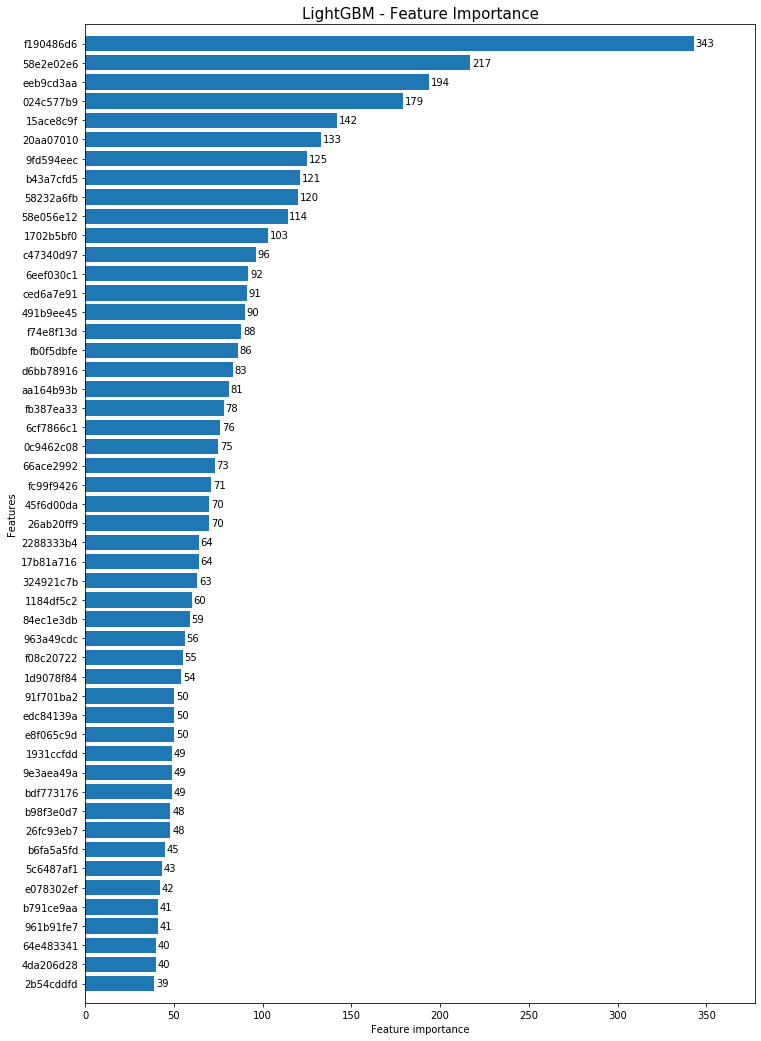

In [21]:
### Feature Importance ###
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# 2nd Notebook

https://www.kaggle.com/alexpengxiao/preprocessing-model-averaging-by-xgb-lgb-1-39

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import os
# print(os.listdir("input"))
import warnings
warnings.filterwarnings("ignore")


In [35]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [36]:
test_ID = test['ID']
y_train = train['target']

In [37]:
#What is this transformation and why?
y_train = np.log1p(y_train)

#### Notes- np.loglp(y_train)

In [38]:
train.drop("ID", axis = 1, inplace = True)
train.drop("target", axis = 1, inplace = True)
test.drop("ID", axis = 1, inplace = True)

In [44]:
len(cols_with_onlyone_val)

256

In [39]:
cols_with_onlyone_val = train.columns[train.nunique() == 1]
train.drop(cols_with_onlyone_val.values, axis=1, inplace=True)
test.drop(cols_with_onlyone_val.values, axis=1, inplace=True)

In [45]:
test.shape

(49342, 4735)

In [46]:
train.shape

(4459, 4735)

#### Why are we getting rid of these columns?

In [50]:
NUM_OF_DECIMALS = 10
train = train.round(NUM_OF_DECIMALS)
test = test.round(NUM_OF_DECIMALS)

In [51]:
#np.array_equal: True if two arrays have the same shape and elements, False otherwise. 
colsToRemove = []
columns = train.columns
for i in range(len(columns)-1):
    v = train[columns[i]].values
    dupCols = []
    for j in range(i + 1,len(columns)):
        if np.array_equal(v, train[columns[j]].values):
            colsToRemove.append(columns[j])

In [52]:
len(colsToRemove)

6

Num of decimals was originally 32, we are looking to see what that change does to number of diplicate columns= if its much higher than 6, we'll get different results

In [53]:
train.drop(colsToRemove, axis=1, inplace=True) 
test.drop(colsToRemove, axis=1, inplace=True) 
train.shape

(4459, 4730)

## Run RandomForest Regressor for feature importances

In [54]:
from sklearn import model_selection
from sklearn import ensemble

In [55]:

def rmsle(y, pred):
    return np.sqrt(np.mean(np.power(y - pred, 2)))

In [56]:
x1, x2, y1, y2 = model_selection.train_test_split(
    train, y_train.values, test_size=0.20, random_state=5)
model = ensemble.RandomForestRegressor(n_jobs=-1, random_state=7)
model.fit(x1, y1)
print(rmsle(y2, model.predict(x2)))

1.5367277914935242


In [57]:
NUM_OF_FEATURES = 1000

col = pd.DataFrame({'importance': model.feature_importances_, 'feature': train.columns}).sort_values(
    by=['importance'], ascending=[False])[:NUM_OF_FEATURES]['feature'].values
train = train[col]
test = test[col]
train.shape


(4459, 1000)

In [ ]:
pd.DataFrame({'importance': model.feature_importances_, 
              'feature': train.columns}).sort_values(by=['importance'], ascending=[False])[:NUM_OF_FEATURES]['feature'].values

In [72]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


I can actually print the best features on a bar graph. To show what it looks like.

## Kolmogorov-Smirnov Test

#### Kolmogorov-Smirnov Test

In [75]:
from scipy.stats import ks_2samp
THRESHOLD_P_VALUE = 0.01 #need tuned
THRESHOLD_STATISTIC = 0.3 #need tuned

In [76]:
train.columns

Index(['f190486d6', 'eeb9cd3aa', 'c47340d97', '58e2e02e6', '15ace8c9f',
       '6eef030c1', '20aa07010', '0c9462c08', 'b43a7cfd5', '9306da53f',
       ...
       '2b58a21fc', 'c3f400e36', 'e8bd579ae', '4bf2b8e7c', '1bf8c2597',
       'b7d59d3b5', 'ea26c7fe6', '467c54d35', '1834f29f5', 'acc4a8e68'],
      dtype='object', length=1000)

In [85]:
diff_cols = []

In [86]:
for col in train.columns:
    statistic, pvalue = ks_2samp(train[col].values, test[col].values)
    if pvalue <= THRESHOLD_P_VALUE or np.abs(statistic) > THRESHOLD_STATISTIC:
        diff_cols.append(col)
# for col in diff_cols:
#     if col in train.columns:
#         train.drop(col, axis=1, inplace=True)
#         test.drop(col, axis=1, inplace=True)
# train.shape

#### rerun with diff_cols being reduced see if accuracy gets better

In [88]:
len(diff_cols)

706

In [83]:
check_cols= []
for col in train.columns:
    statistic, pvalue = ks_2samp(train[col].values, test[col].values)
    check_cols.append((statistic,pvalue))

## Add Statistical Features To Original Features

In [ ]:
from sklearn import random_projection
ntrain = len(train)
ntest = len(test)
tmp = pd.concat([train,test])#RandomProjection

In [89]:
tmp

,f190486d6,eeb9cd3aa,c47340d97,58e2e02e6,15ace8c9f,6eef030c1,20aa07010,0c9462c08,b43a7cfd5,9306da53f,...,2b58a21fc,c3f400e36,e8bd579ae,4bf2b8e7c,1bf8c2597,b7d59d3b5,ea26c7fe6,467c54d35,1834f29f5,acc4a8e68
0,1866666.66,700000.0,0.0,12066666.66,4100000.0,900000.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,4000000.0,0.0,0.00000,0.0,0.0
1,0.00,2225000.0,0.0,2850000.00,0.0,800000.0,2200000.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,2000000.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.00,0.0,8000000.0,0.00,0.0,37662000.0,2000000.0,5400000.0,0.000000,1180000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49337,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
49338,20000000.00,25000000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
49339,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,453053.291456,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279444.07912,0.0,0.0
49340,0.00,600000.0,0.0,100000.00,0.0,1007500.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [90]:
weight = ((train != 0).sum()/len(train)).values

Weight is the weight we are giving to each feature, based on non-zero numbers
Wouldn't this favor larger nnumbers in solution?
What if theres a column of signel digits?
Is this the reason we made rounded?

In [94]:
tmp.describe()

,f190486d6,eeb9cd3aa,c47340d97,58e2e02e6,15ace8c9f,6eef030c1,20aa07010,0c9462c08,b43a7cfd5,9306da53f,...,2b58a21fc,c3f400e36,e8bd579ae,4bf2b8e7c,1bf8c2597,b7d59d3b5,ea26c7fe6,467c54d35,1834f29f5,acc4a8e68
count,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,...,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04,5.380100e+04
mean,1.552496e+06,1.559502e+06,1.089759e+06,1.551480e+06,1.510127e+06,1.528107e+06,1.502720e+06,7.869479e+05,1.493575e+06,7.489870e+05,...,3.086877e+05,3.684034e+05,5.290658e+05,6.908677e+04,2.424256e+05,1.341818e+06,4.359903e+05,1.726203e+05,1.799335e+05,2.490711e+05
std,6.943002e+06,7.357204e+06,6.361596e+06,7.395933e+06,7.211676e+06,7.253193e+06,7.146372e+06,5.752809e+06,7.278108e+06,6.089780e+06,...,6.603065e+06,4.400098e+06,8.032864e+06,2.151086e+06,3.030364e+06,1.390994e+07,7.383222e+06,3.438100e+06,3.484476e+06,3.855291e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.196120e+08,3.367845e+08,5.262293e+08,3.433333e+08,3.196120e+08,3.433333e+08,3.435658e+08,3.196120e+08,3.436712e+08,5.471569e+08,...,8.464196e+08,3.845668e+08,4.047560e+08,2.654305e+08,1.731403e+08,8.606600e+08,4.216000e+08,3.367851e+08,3.883172e+08,5.050000e+08


In [93]:
weight

array([3.46265979e-01, 3.39089482e-01, 3.48732900e-01, 3.39313747e-01,
       3.33034313e-01, 3.26306347e-01, 3.35052702e-01, 1.59677058e-01,
       3.22493833e-01, 1.61919713e-01, 1.67302086e-01, 3.15990132e-01,
       3.40883606e-01, 3.31240188e-01, 1.72460193e-01, 3.40435075e-01,
       3.31240188e-01, 3.35276968e-01, 3.36398296e-01, 3.33034313e-01,
       3.41107872e-01, 3.35052702e-01, 5.09082754e-02, 3.22269567e-01,
       3.46938776e-01, 3.41556403e-01, 1.59452792e-01, 1.59228527e-01,
       1.55640278e-01, 1.55640278e-01, 3.11729087e-02, 3.39313747e-01,
       3.45144651e-01, 1.65732227e-01, 1.78515362e-01, 1.53173357e-01,
       1.97353667e-02, 1.29625477e-01, 3.44247589e-01, 4.53016371e-02,
       3.27651940e-01, 1.58107199e-01, 5.27023996e-02, 1.61246916e-01,
       3.34604171e-01, 3.50975555e-01, 3.07243777e-02, 3.22942364e-02,
       1.56088809e-01, 2.01838977e-02, 3.29894595e-01, 2.33236152e-02,
       5.83090379e-02, 3.50975555e-01, 3.37295358e-01, 1.47566719e-01,
      

In [95]:
# This formula seems to get rid of 0 values and makes them Nan Values
# train[train!=0]

,f190486d6,eeb9cd3aa,c47340d97,58e2e02e6,15ace8c9f,6eef030c1,20aa07010,0c9462c08,b43a7cfd5,9306da53f,...,2b58a21fc,c3f400e36,e8bd579ae,4bf2b8e7c,1bf8c2597,b7d59d3b5,ea26c7fe6,467c54d35,1834f29f5,acc4a8e68
0,1866666.66,700000.00,NaN,12066666.66,4100000.00,900000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4000000.0,NaN,NaN,NaN,NaN
1,NaN,2225000.00,NaN,2850000.00,NaN,800000.0,2200000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8000000.0,NaN,NaN,37662000.0,2000000.0,5400000.0,NaN,1180000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,NaN,3191666.66,NaN,680000.00,860000.00,1250000.0,70000.0,2250000.0,206666.66,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000.0,NaN,NaN,NaN,NaN
4455,242666.66,37333.34,375000.0,NaN,50000.00,62000.0,375000.0,375000.0,375000.00,375000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4456,NaN,2597000.00,NaN,4640000.00,3358333.34,14886000.0,NaN,NaN,1148000.00,NaN,...,NaN,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4457,200000.00,NaN,1500000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
train

,f190486d6,eeb9cd3aa,c47340d97,58e2e02e6,15ace8c9f,6eef030c1,20aa07010,0c9462c08,b43a7cfd5,9306da53f,...,2b58a21fc,c3f400e36,e8bd579ae,4bf2b8e7c,1bf8c2597,b7d59d3b5,ea26c7fe6,467c54d35,1834f29f5,acc4a8e68
0,1866666.66,700000.00,0.0,12066666.66,4100000.00,900000.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0.0,0.0,4000000,0,0.0,0.0,0.0
1,0.00,2225000.00,0.0,2850000.00,0.00,800000.0,2200000.0,0.0,0.00,0.0,...,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
2,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
3,2000000.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,0.00,0.00,8000000.0,0.00,0.00,37662000.0,2000000.0,5400000.0,0.00,1180000.0,...,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,0.00,3191666.66,0.0,680000.00,860000.00,1250000.0,70000.0,2250000.0,206666.66,0.0,...,0.0,0.0,0,0.0,0.0,6000000,0,0.0,0.0,0.0
4455,242666.66,37333.34,375000.0,0.00,50000.00,62000.0,375000.0,375000.0,375000.00,375000.0,...,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
4456,0.00,2597000.00,0.0,4640000.00,3358333.34,14886000.0,0.0,0.0,1148000.00,0.0,...,0.0,800000.0,0,0.0,0.0,0,0,0.0,0.0,0.0
4457,200000.00,0.00,1500000.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0


In [96]:
tmp_train = train[train!=0]
tmp_test = test[test!=0]

In [98]:
train["weight_count"] = (tmp_train*weight).sum(axis=1)
test["weight_count"] = (tmp_test*weight).sum(axis=1)

In [99]:
train["count_not0"] = (train != 0).sum(axis=1)
test["count_not0"] = (test != 0).sum(axis=1)

In [100]:
train["sum"] = train.sum(axis=1)
test["sum"] = test.sum(axis=1)

In [101]:
train["var"] = tmp_train.var(axis=1)
test["var"] = tmp_test.var(axis=1)

In [102]:
train["median"] = tmp_train.median(axis=1)
test["median"] = tmp_test.median(axis=1)

In [103]:
train["mean"] = tmp_train.mean(axis=1)
test["mean"] = tmp_test.mean(axis=1)

In [104]:
train["std"] = tmp_train.std(axis=1)
test["std"] = tmp_test.std(axis=1)

In [105]:
train["max"] = tmp_train.max(axis=1)
test["max"] = tmp_test.max(axis=1)

In [106]:
train["min"] = tmp_train.min(axis=1)
test["min"] = tmp_test.min(axis=1)

In [107]:
train["skew"] = tmp_train.skew(axis=1)
test["skew"] = tmp_test.skew(axis=1)

In [108]:
train["kurtosis"] = tmp_train.kurtosis(axis=1)
test["kurtosis"] = tmp_test.kurtosis(axis=1)

In [109]:
del(tmp_train)
del(tmp_test)

In [110]:
# we created all of the extra columns as a way to show the description of each row? 
# we should have just added it to another column

,f190486d6,eeb9cd3aa,c47340d97,58e2e02e6,15ace8c9f,6eef030c1,20aa07010,0c9462c08,b43a7cfd5,9306da53f,...,count_not0,sum,var,median,mean,std,max,min,skew,kurtosis
0,1866666.66,700000.00,0.0,12066666.66,4100000.00,900000.0,0.0,0.0,0.00,0.0,...,74,5.927257e+08,1.040140e+14,2600000.0,7.000936e+06,1.019872e+07,40000000.0,250000.0,2.050243,3.427304
1,0.00,2225000.00,0.0,2850000.00,0.00,800000.0,2200000.0,0.0,0.00,0.0,...,55,2.990598e+08,4.139478e+13,2000000.0,4.869753e+06,6.433877e+06,32000000.0,800000.0,2.950773,9.150874
2,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,14,7.892648e+07,1.480308e+13,4000000.0,4.984615e+06,3.847477e+06,12000000.0,500000.0,0.796913,-0.170575
3,2000000.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,14,2.158622e+07,4.466492e+12,320000.0,1.418308e+06,2.113408e+06,6000000.0,2000.0,1.714594,1.814305
4,0.00,0.00,8000000.0,0.00,0.00,37662000.0,2000000.0,5400000.0,0.00,1180000.0,...,25,2.035188e+08,9.991360e+13,4700000.0,6.937250e+06,9.995679e+06,37662000.0,60000.0,2.647484,6.728590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,0.00,3191666.66,0.0,680000.00,860000.00,1250000.0,70000.0,2250000.0,206666.66,0.0,...,70,2.644318e+08,3.557320e+13,2000000.0,3.443280e+06,5.964328e+06,48080000.0,30000.0,6.318300,47.295335
4455,242666.66,37333.34,375000.0,0.00,50000.00,62000.0,375000.0,375000.0,375000.00,375000.0,...,116,3.570990e+07,2.506673e+10,375000.0,2.518870e+05,1.583248e+05,800000.0,2000.0,-0.037955,-0.678643
4456,0.00,2597000.00,0.0,4640000.00,3358333.34,14886000.0,0.0,0.0,1148000.00,0.0,...,137,1.648451e+09,1.542568e+15,2425000.0,1.010296e+07,3.927554e+07,319612000.0,10000.0,7.387140,56.702914
4457,200000.00,0.00,1500000.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,...,55,1.159522e+08,1.358015e+12,1500000.0,1.748148e+06,1.165339e+06,8000000.0,200000.0,3.369523,15.645773


where n_components is the size of the projected subspace

In [112]:
NUM_OF_COM = 100 #need tuned
transformer = random_projection.SparseRandomProjection(n_components = NUM_OF_COM)
RP = transformer.fit_transform(tmp)
rp = pd.DataFrame(RP)
columns = ["RandomProjection{}".format(i) for i in range(NUM_OF_COM)]
rp.columns = columns

In [113]:
rp

,RandomProjection0,RandomProjection1,RandomProjection2,RandomProjection3,RandomProjection4,RandomProjection5,RandomProjection6,RandomProjection7,RandomProjection8,RandomProjection9,...,RandomProjection90,RandomProjection91,RandomProjection92,RandomProjection93,RandomProjection94,RandomProjection95,RandomProjection96,RandomProjection97,RandomProjection98,RandomProjection99
0,6.551276e+06,-1.124683e+07,3.936389e+05,-2.249365e+05,4.629944e+06,974724.967412,-2.299976e+07,5.792116e+06,1.462087e+06,-1.237151e+06,...,0.000000e+00,0.000000e+00,-7.394788e+06,5.342243e+05,3.655219e+05,8.831571e+06,-6.298223e+06,-2.319658e+06,2.528193e+07,-8.716291e+06
1,1.124683e+06,-2.249365e+06,-1.674371e+07,2.249365e+06,0.000000e+00,0.000000,-1.012214e+06,-6.560649e+06,-3.486516e+06,6.073286e+06,...,-1.124683e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.574556e+07,6.373202e+05,1.124683e+06,-1.012214e+06,0.000000e+00,-1.124683e+05
2,0.000000e+00,0.000000e+00,2.249365e+06,8.435120e+05,0.000000e+00,0.000000,-5.904584e+06,0.000000e+00,2.249365e+06,0.000000e+00,...,0.000000e+00,2.249365e+06,0.000000e+00,0.000000e+00,3.092877e+06,-3.655219e+06,0.000000e+00,0.000000e+00,0.000000e+00,6.748096e+06
3,0.000000e+00,0.000000e+00,5.623413e+04,5.623413e+04,1.068449e+06,0.000000,0.000000e+00,0.000000e+00,2.924175e+05,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.623413e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,3.374048e+06,0.000000e+00,-1.349619e+06,-3.374048e+06,0.000000,0.000000e+00,3.374048e+04,-1.124683e+06,0.000000e+00,...,0.000000e+00,4.245677e+06,0.000000e+00,-3.036643e+06,2.249365e+06,5.623413e+06,0.000000e+00,0.000000e+00,-3.374048e+06,3.374048e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53796,0.000000e+00,0.000000e+00,0.000000e+00,-1.597062e+07,0.000000e+00,0.000000,-3.231574e+06,-2.407921e+05,0.000000e+00,-1.325731e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.721063e+05,5.280028e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
53797,0.000000e+00,0.000000e+00,1.405853e+07,0.000000e+00,1.124683e+07,0.000000,-1.968195e+07,0.000000e+00,2.328093e+05,1.093754e+06,...,1.124683e+07,0.000000e+00,0.000000e+00,0.000000e+00,-3.464023e+05,-1.799492e+06,0.000000e+00,-4.267608e+06,-1.911961e+05,0.000000e+00
53798,3.133180e+05,6.194301e+06,0.000000e+00,0.000000e+00,-6.194301e+06,0.000000,-3.835551e+06,0.000000e+00,0.000000e+00,3.835551e+06,...,3.133180e+05,0.000000e+00,-4.451867e+06,-1.044078e+08,0.000000e+00,-7.644071e+05,1.085486e+08,0.000000e+00,-8.697351e+06,0.000000e+00
53799,0.000000e+00,0.000000e+00,3.374048e+05,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-1.124683e+04,...,0.000000e+00,0.000000e+00,-1.124683e+04,0.000000e+00,1.124683e+04,0.000000e+00,5.623413e+03,-5.623413e+03,1.124683e+05,0.000000e+00


In [115]:
rp_train = rp[:ntrain]
rp_test = rp[ntrain:]
rp_test.index = test.index

In [116]:
#concat RandomProjection and raw data
train = pd.concat([train,rp_train],axis=1)
test = pd.concat([test,rp_test],axis=1)

del(rp_train)
del(rp_test)
train.shape

(4459, 1111)

In [119]:
list(train.columns)[150:]

['c928b4b74',
 '134ac90df',
 'b6daeae32',
 'a3382e205',
 'f1e0ada11',
 '91f701ba2',
 '1520de553',
 '1857fbccf',
 '45f6d00da',
 'fec5eaf1a',
 'b64425521',
 'd79736965',
 '36a9a8479',
 'a3ef69ad5',
 'db3839ab0',
 'c7775aabf',
 'bee629024',
 'c2dae3a5a',
 '8895ea516',
 'bfbc53791',
 '19915a6d3',
 '935ca66a9',
 'e78e3031b',
 '5a1589f1a',
 'c4972742d',
 '75e55b7a9',
 '0c8063d63',
 '8337d1adc',
 '8f57141ec',
 '74fb8f14c',
 'beb887591',
 '61c1b7eb6',
 'ef38209dc',
 '5ef415428',
 '81de0d45e',
 'a8dd5cea5',
 '2c95e6e31',
 '9370aa48d',
 '1fa0f78d0',
 'fc9d04cd7',
 'dcfcddf16',
 'd6bca77b4',
 'a2da3c1d5',
 '762cbd0ab',
 '1977eaf08',
 'cfc1ce276',
 '8b710e161',
 'ce3d7595b',
 '8618bc1fd',
 '350473311',
 '23db7d793',
 '33e4f9a0e',
 'b7c931383',
 'e23fe2e46',
 'f16a196c6',
 '4b6dfc880',
 'ba42e41fa',
 '0dc4d6c7d',
 'dfd179071',
 'a34f8d443',
 '4ecc3f505',
 'e4159c59e',
 '896d1c52d',
 '1d9078f84',
 '5b943716b',
 '850027e38',
 '77697c671',
 '704e2dc55',
 '7ab926448',
 '27461b158',
 '504e4b156',
 '04b8

## Run Cross-validation Methods and Models

In [120]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
#define evaluation method for a given model. we use k-fold cross validation on the training set. 
#the loss function is root mean square logarithm error between target and prediction
#note: train and y_train are feeded as global variables

cv in KFOLD

In [121]:
NUM_FOLDS = 5 #need tuned
def rmsle_cv(model):
    kf = KFold(NUM_FOLDS, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [122]:
#ensemble method: model averaging
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    # the reason of clone is avoiding affect the original base models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]  
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([ model.predict(X) for model in self.models_ ])
        return np.mean(predictions, axis=1)

In [123]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.055, colsample_bylevel =0.5, 
                             gamma=1.5, learning_rate=0.02, max_depth=32, 
                             objective='reg:linear',booster='gbtree',
                             min_child_weight=57, n_estimators=1000, reg_alpha=0, 
                             reg_lambda = 0,eval_metric = 'rmse', subsample=0.7, 
                             silent=1, n_jobs = -1, early_stopping_rounds = 14,
                             random_state =7, nthread = -1)


In [124]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=144,
                              learning_rate=0.005, n_estimators=720, max_depth=13,
                              metric='rmse',is_training_metric=True,
                              max_bin = 55, bagging_fraction = 0.8,verbose=-1,
                              bagging_freq = 5, feature_fraction = 0.9)

In [125]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
averaged_models = AveragingModels(models = (model_xgb, model_lgb))
score = rmsle_cv(averaged_models)
print("averaged score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Xgboost score: 1.3610 (0.0590)

LGBM score: 1.3468 (0.0460)

averaged score: 1.3459 (0.0524)



In [126]:
averaged_models.fit(train.values, y_train)
pred = np.expm1(averaged_models.predict(test.values))
ensemble = pred

In [128]:
len(ensemble)

49342

In [29]:
sub = pd.DataFrame()
sub['ID'] = test_ID
sub['target'] = ensemble
sub.to_csv('submission2.csv',index=False)

#Xgboost score: 1.3582 (0.0640)
#LGBM score: 1.3437 (0.0519)
#averaged score: 1.3431 (0.0586)

#Xgboost score: 1.3566 (0.0525)
#LGBM score: 1.3477 (0.0497)
#averaged score: 1.3438 (0.0516)

#Xgboost score: 1.3540 (0.0621)
#LGBM score: 1.3463 (0.0485)
#averaged score: 1.3423 (0.0556)

In [3]:
ls

baseline_lgb.csv        test.csv                value_prediction.ipynb
sample_submission.csv   train.csv


In [ ]:
'''
https://www.kaggle.com/c/santander-value-prediction-challenge/notebooks?sortBy=commentCount&group=everyone&pageSize=20&competitionId=9717

Initial Notebook
https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-santander-value




'''

Simple Exploration Notebook | Kaggle
Two Sigma Financial Modeling Challenge | Kaggle
Kaggle Gym API Overview
Simple Exploration Notebook | Kaggle
Two Sigma Time Travel (EDA) | Kaggle
Am I Over-fitting? | Kaggle
kagglegym_emulation